# Exploratory data analysis (EDA) of Haberman's Survival Dataset

### Data Description :

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospitalon the survival of patients who had undergone surgery for breast cancer.

### Attribute Information :

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

### Objective :

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of operation and the number of positive axillary nodes.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Loading data into the notebook using pandas dataframe
df = pd.read_csv("haberman.csv")

In [23]:
df.shape

(306, 4)

#### Observation :
The dataset consists of 306 data points and 3 features

In [24]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

#### Observation :
Name of features are age, year and Nodes

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [26]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

#### Observation
Count of people that survived the disease for 5 years or longer are 225 and the ones who died within 5 years are 81.
Dataset is imbalanced but complete as no value is missing.

In [31]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Univariate Analysis(pdf, cdf, boxplot and violin plot)


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


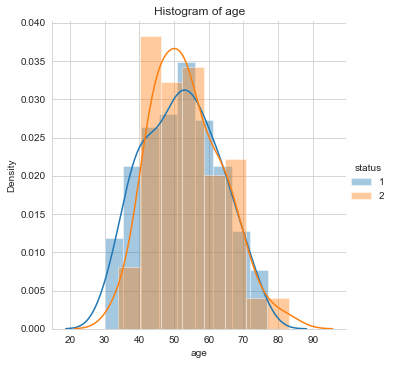

In [39]:
# Using age feature to generate PDF

sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot, 'age').add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


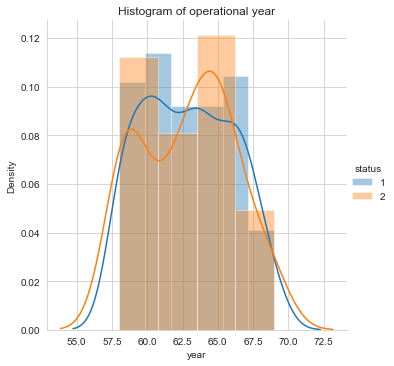

In [42]:
# using year feature to generate PDF

sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot, 'year').add_legend()
plt.title("Histogram of operational year")
plt.ylabel("Density")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


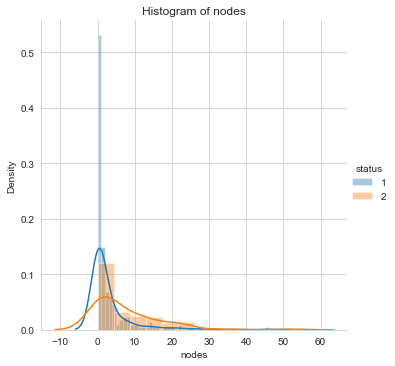

In [43]:
# using nodes feature to generate PDF

sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status', height=5).map(sns.distplot, 'nodes').add_legend()
plt.title("Histogram of nodes")
plt.ylabel("Density")
plt.show()

#### Observation :
PDF of age and year overlap on each other. So, using this datapoint we cannot predict anything
From PDF of nodes, it is clear that people have greater survival rate, if they have less number of nodes detected and vice versa.

PDF of Axillary nodes and can conclude below result :

if(nodes ≤ 0)
  Patient = Long survival
else if(nodes ≥ 0 && nodes ≤ 3.5(approx))
  Patient = Long survival chances are high
else if(nodes ≥ 3.5)
  Patient = Short survival

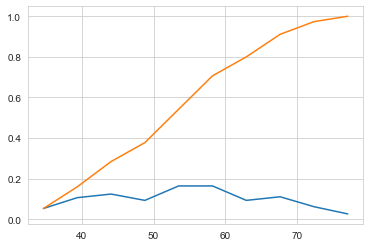

In [47]:
# CDF(Cummulative Distributed Function) of age

haberman_Survival_years = df.loc[df["status"] == 1]
counts, bin_edges = np.histogram(haberman_Survival_years["age"], bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

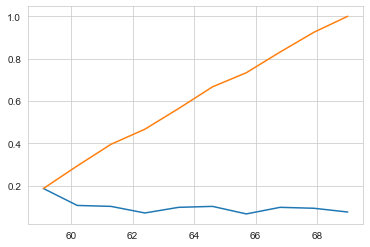

In [48]:
# CDF(Cummulative Distributed Function) of year

haberman_Survival_years = df.loc[df["status"] == 1]
counts, bin_edges = np.histogram(haberman_Survival_years["year"], bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

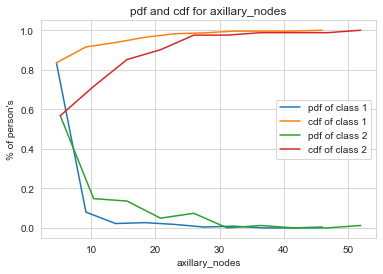

In [54]:
# CDF(Cummulative Distributed Function) of nodes

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
haberman_Survival_years = df.loc[df["status"] == 1]
haberman_Failure_years = df.loc[df["status"] == 2]
counts, bin_edges = np.histogram(haberman_Survival_years["nodes"], bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(haberman_Failure_years["nodes"], bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for axillary_nodes")
plt.xlabel("axillary_nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()

#### Observations :


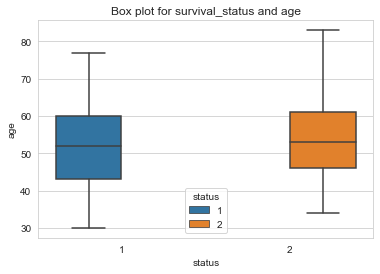

In [67]:
# Box Plot

sns.boxplot(x='status', y='age', hue="status", data=df).set_title("Box plot for survival_status and age")
plt.show()

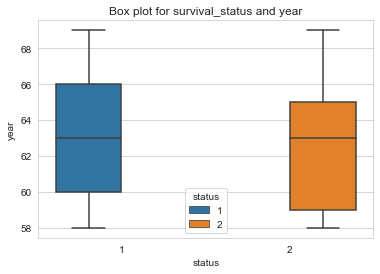

In [63]:
sns.boxplot(x='status', y='year', hue="status", data=df).set_title("Box plot for survival_status and year")
plt.show()

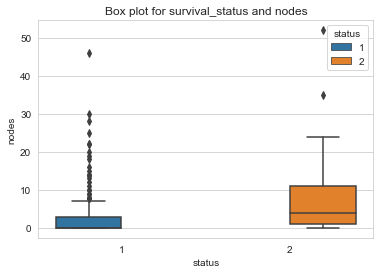

In [61]:
sns.boxplot(x='status', y='nodes', hue="status", data=df).set_title("Box plot for survival_status and nodes")
plt.show()

Height of box represents all data between 25th percentile to 75th percentile and that horizontal bar represents maximum range of that data and width of box represents spread of that data in data set. Also, the small point above that vertical bar are outliers.

#### Observation :
In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2
So,if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status

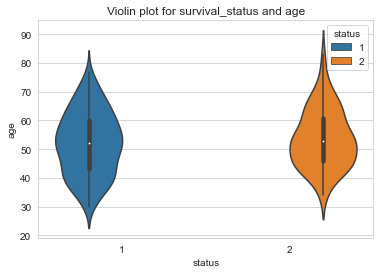

In [70]:
# Vilon Plot

sns.violinplot(x = "status", y = "age", hue = "status", data = df)
plt.title("Violin plot for survival_status and age")
plt.show()

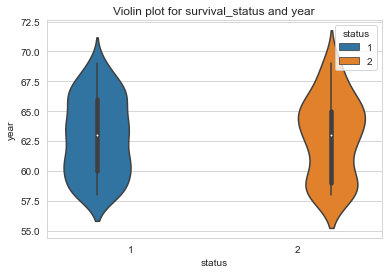

In [72]:
sns.violinplot(x = "status", y = "year", hue = "status", data = df)
plt.title("Violin plot for survival_status and year")
plt.show()

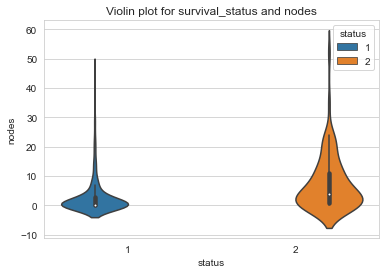

In [73]:
sns.violinplot(x = "status", y = "nodes", hue = "status", data = df)
plt.title("Violin plot for survival_status and nodes")
plt.show()

#### Observation :

In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–12

## Bivariate Analysis

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


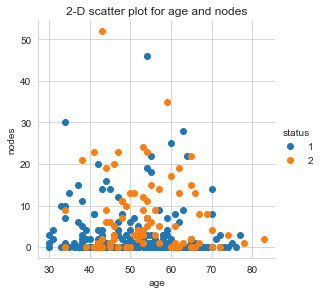

In [78]:
# Scatter plot to check relationship between any two features

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status", size = 4).map(plt.scatter, "age", "nodes").add_legend()
plt.title("2-D scatter plot for age and nodes")
plt.show()

#### Observation :

As there are 3 features from which we can conclude our classification so how can we select any feature from all so that we can get output with less error rate. To do so we can use pairplots from seaborn to plot of various combination

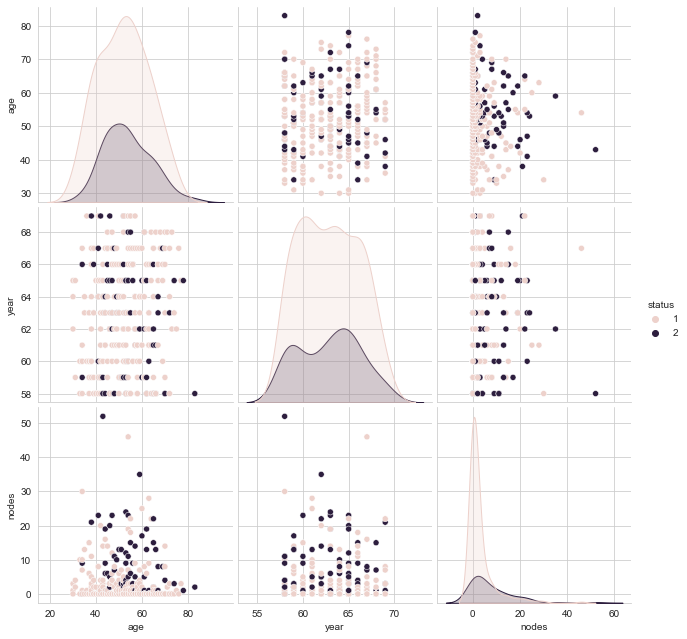

In [82]:
# pair-plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=3);
plt.show()

#### Observation :

Plot numbers 3, 7 have some distinguisable points, while plots 2, 4, 6, 8 are almost overlapping. Hence we can use plot 3 and 7 for analysis

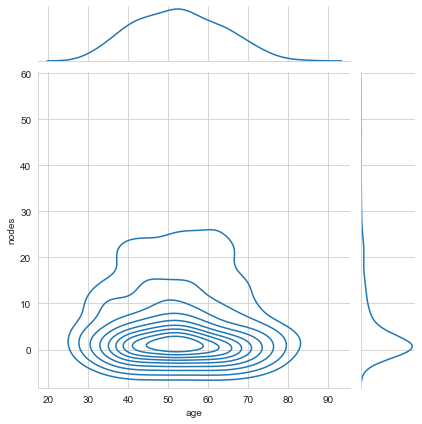

In [77]:
sns.jointplot(x="age", y="nodes", data=df, kind="kde");
plt.show();

#### Observation :
Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

### Overall Conclusion

The given dataset is imbalenced as it does not contains euqal number of data-points for each class.

The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.

Univariate classification information about the distribution of attributes across the range for each class.

Bivariate classification suggests that age and nodes are important features on which we can do further analysis and prediction.

Somehow axillary_lymph_node is giving some intution in the dataset.

We can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.